In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import tensorflow as tf
import math
import time
from module.lib.layers import *
import module.lib.functions as func
from module.lib import optical_chart
import pandas as pd
import cv2
import glob
import re
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["font.size"]=18

In [78]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [155]:
model_path = '/Users/takumi/Documents/研究/D2NN/model/Proposal MOD2NN/trained_data/with analyzer/20220424_7'
model = tf.keras.models.load_model(model_path)
#model.summary()
#model.get_config()

In [156]:
pattern = r'cx_mo'
mo_layers = []
save = False
each_save = False
for layer in model.layers:
    result = re.match(pattern, layer.name)
    if result:
        mo_layers.append(layer)

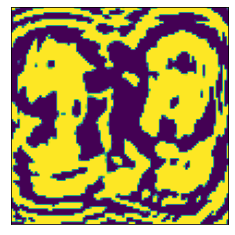

In [157]:
from matplotlib.colors import LinearSegmentedColormap
cmap12 = LinearSegmentedColormap.from_list('custom', ["#d8d4e5", "#eebbc3"])

for i in range(len(mo_layers)):
    w = mo_layers[i].get_weights()[0]
    w = np.sin(w)
    #w = np.where(w>0,1,0)
    plt.imshow(w, cmap="viridis", interpolation=None)
    plt.xticks([],[])
    plt.yticks([],[])
    plt.savefig("images/faraday_l"+str(i)+".png", dpi=300)

AttributeError: __enter__

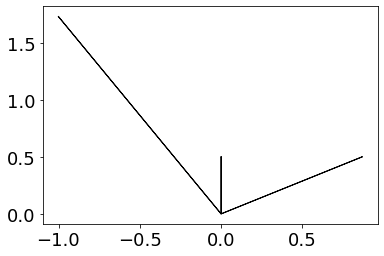

In [21]:
r1 = 1.0
r2 = 2.0
r3 = -0.5
theta1 = r1*np.pi/6
theta2 = r2*np.pi/3
theta3 = r3*np.pi

a1 = r1 * tf.exp(1.0j*theta1)
a2 = r2*tf.exp(1.0j*theta2)
a3 = r3*tf.exp(1.0j*theta3)
plt.arrow(0,0,tf.math.real(a1),tf.math.imag(a1))
plt.arrow(0,0,tf.math.real(a2),tf.math.imag(a2))
plt.arrow(0,0,tf.math.real(a3),tf.math.imag(a3))



with tf.GradientTape as tape:
    tape.watch(a1)
    a = tf.abs(a1+a2+a3)

plt.arrow(0,0, tf.math.real(a), tf.math.imag(a), color="red")